# OASIS INFOBYTE
## TASK 1-Iris Classification 
### Siddharth Dhodi


### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Loading the Dataset

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns = ["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data Preprocessing

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Visualization

<AxesSubplot:>

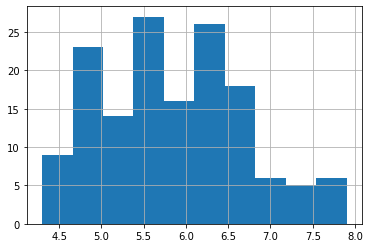

In [8]:
df["SepalLengthCm"].hist()

<AxesSubplot:>

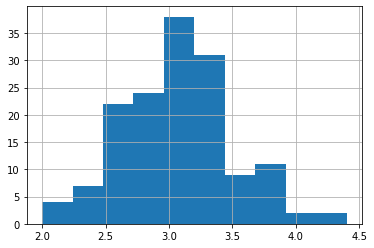

In [9]:
df["SepalWidthCm"].hist()

<AxesSubplot:>

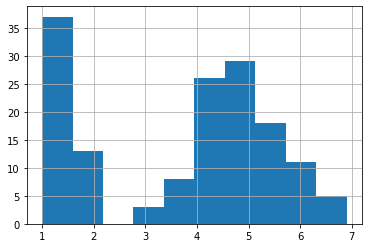

In [10]:
df["PetalLengthCm"].hist()

<AxesSubplot:>

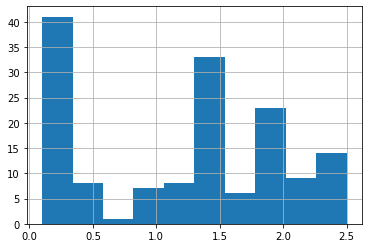

In [11]:
df["PetalWidthCm"].hist()

In [12]:
colors=["red","blue","orange"]
Species=["Iris-setosa","Iris-versicolor","Iris-virginica"]

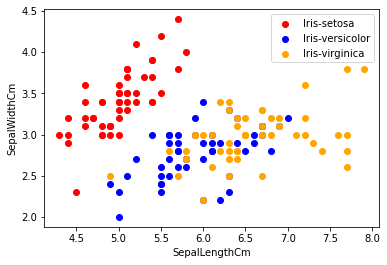

In [13]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x["SepalLengthCm"],x["SepalWidthCm"],c=colors[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend(Species)
    

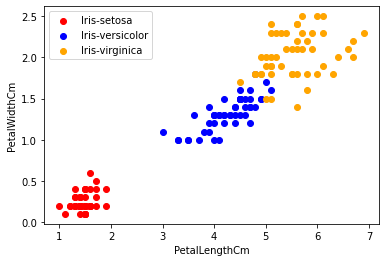

In [14]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x["PetalLengthCm"],x["PetalWidthCm"],c=colors[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(Species)

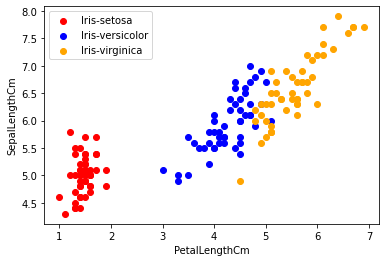

In [15]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x["PetalLengthCm"],x["SepalLengthCm"],c=colors[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("SepalLengthCm")
plt.legend(Species)

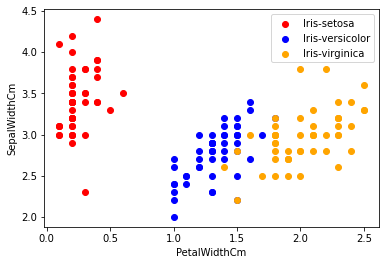

In [16]:
for i in range(3):
    x=df[df["Species"]==Species[i]]
    plt.scatter(x["PetalWidthCm"],x["SepalWidthCm"],c=colors[i])
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalWidthCm")
plt.legend(Species)

### Coorelation Matrix

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

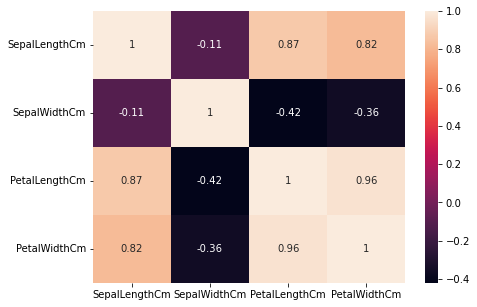

In [18]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(7,5))
sb.heatmap(corr,annot=True,ax=ax)

### Label Encoding


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df["Species"]=le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### After encoding 
#### 0- Iris-setosa
#### 1- Iris-versicolor
#### 2- Iris-virginica

### Model Training

In [21]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=["Species"])
y=df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [22]:
from sklearn.linear_model import LogisticRegression
Model=LogisticRegression()

In [23]:
Model.fit(x_train,y_train)

LogisticRegression()

In [24]:
print(Model.score(x_test,y_test))

1.0


In [25]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
print(model.score(x_train,y_train))

0.9809523809523809


In [28]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

model2.fit(x_train,y_train)

In [29]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
model2.score(x_test,y_test)*100

93.33333333333333

In [31]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Predicting the species

In [33]:
sepal_length=float(input("Enter sepal length"))
sepal_width=float(input("Enter sepal width"))
petal_length=float(input("Enter petal length"))
petal_width=float(input("Enter petal width"))
features=np.array([sepal_length,sepal_width,petal_length,petal_width])
features=features.reshape(1,-1)
result=Model.predict(features)
print("species :{}".format(result))


Enter sepal length3
Enter sepal width1.2
Enter petal length1.0
Enter petal width1.5
species :[0]


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 0- Iris-setosa
#### 1- Iris-versicolor
#### 2- Iris-virginica